<a href="https://colab.research.google.com/github/marvin-hansen/AI-FUN/blob/master/Socrates_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Philosophic quote generator



---

|    	|               	|
|---------	|-------------------------	|
| Author  	| Marvin Hansen           	|
| Contact 	| marvin.hansen@gmail.com 	|
| Version 	| 0.1                     	|
| Updated 	| April 26, 2019          	|



## Summary
---

@TODO 


## Changelog

---
* V-0.1 [Apr/25] Added installs, imports, data loader, and procs

## Compatibility
---

Lib's
* Python Version: 3.6.7
* Pandas Version: 0.24.2
* Numpy Version: 1.16.3
* PyTorch Version: 1.0.1.post2


GPU Acceleration 
* GPU: NVDIA Tesla T4 
* Cuda V10.0.130


# Installs 

In [1]:
# update pandas 
!pip install --upgrade numpy

# update pandas 
!pip install --upgrade pandas  


# install latet fast.ai release
# https://github.com/fastai/fastai/releases
!curl -s https://course.fast.ai/setup/colab | bash
!ls

Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.16.3)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.24.2)
ln: failed to create symbolic link '/content/data': File exists
Updating fastai...
Done.
data  models  quotes.csv


# Imports

In [2]:
import datetime
import platform
import warnings

import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import fastai
from fastai.imports import *
from fastai.basics import *
from fastai import *
from fastai.text import *


import platform
print("Done")

Done


## GPU Accelerations 

In [3]:
torch.cuda.current_device()

print("Cuda available: " + str(torch.cuda.is_available()))
print("Cuda enabled:" + str(torch.backends.cudnn.enabled))

#https://stackoverflow.com/questions/48152674/how-to-check-if-pytorch-is-using-the-gpu
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()


#Additional Info when using cuda
if device.type == 'cuda':
    print("GPU used: " + torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Cuda available: True
Cuda enabled:True
Using device: cuda

GPU used: Tesla T4
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


# Constants & Flags

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [0]:
#batch size 
bs = 64
# bs = 32 
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [0]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html
np.random.seed(42) 

# Data

In [7]:
! wget https://github.com/paraschopra/generating-text-small-corpus/raw/master/data/quotes.csv

--2019-04-26 17:18:14--  https://github.com/paraschopra/generating-text-small-corpus/raw/master/data/quotes.csv
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/paraschopra/generating-text-small-corpus/master/data/quotes.csv [following]
--2019-04-26 17:18:15--  https://raw.githubusercontent.com/paraschopra/generating-text-small-corpus/master/data/quotes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1062011 (1.0M) [text/plain]
Saving to: ‘quotes.csv.1’

quotes.csv.1        100%[===================>]   1.01M  --.-KB/s    in 0.05s   

2019-04-26 17:18:15 (22.3 MB/s) - ‘quotes.cs

In [8]:
df = pd.read_csv('quotes.csv', sep=r'\<\|\>', header=None, names=['text', 'author'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [9]:

df.head()


,text,author
0,A serious and good philosophical work could be...,Wittgenstein
1,The limits of my language means the limits of ...,Wittgenstein
2,"I don't know why we are here, but I'm pretty s...",Wittgenstein
3,"Whereof one cannot speak, thereof one must be ...",Wittgenstein
4,Hell isn't other people. Hell is yourself.,Wittgenstein


In [0]:
df['text'] = df['text'].str.lower()


Split & Train & Test

In [11]:
valid_pct = 0.10 #validation percent
df = df.iloc[np.random.permutation(len(df))]
cut = int(valid_pct * len(df)) + 1
train_df, valid_df = df[cut:], df[:cut]
len(train_df), len(valid_df)


(4616, 514)

In [12]:
nan_rows = df[df['text'].isnull()]

nan_rows


,text,author


# Prepare model


Create databunch

In [0]:
data_lm = TextLMDataBunch.from_df('data', train_df, valid_df, text_cols='text',
                           label_cols='author')

Create learner

In [0]:
#learn = language_model_learner(data=data_lm,arch=Transformer, drop_mult=0.5)

#learn.destroy()

learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

In [0]:
# Train model

In [16]:
learn.fit_one_cycle(1, 1e-2)


epoch,train_loss,valid_loss,accuracy,time
0,5.095224,4.510725,0.221652,00:08


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


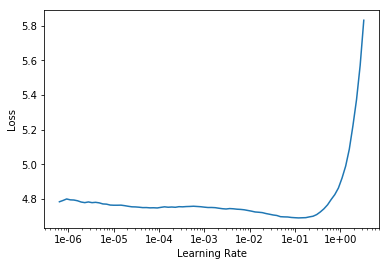

In [17]:
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.546572,4.242918,0.253080,00:11


epoch,train_loss,valid_loss,accuracy,time
0,4.397942,4.211061,0.253973,00:10


epoch,train_loss,valid_loss,accuracy,time
0,4.342721,4.173782,0.256161,00:10
1,4.272694,4.104602,0.263080,00:10
2,4.144128,4.050588,0.268170,00:10
3,3.996112,4.020431,0.272098,00:10
4,3.894312,4.020176,0.273080,00:10


epoch,train_loss,valid_loss,accuracy,time
0,3.810131,4.009004,0.273795,00:10
1,3.783028,3.985039,0.277455,00:10
2,3.676878,3.958035,0.282813,00:10
3,3.551162,3.952961,0.284152,00:10
4,3.458085,3.951052,0.285000,00:10


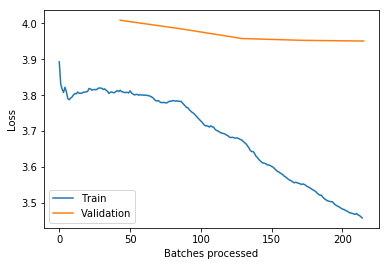

In [19]:
  # start with a mega rate
  learn.fit_one_cycle(3, 3e-4)
 
  # smaller rate with smaller steps
  learn.fit_one_cycle(5, 1e-3, wd=0.1)
  # plot losses
  
  # smaller rate with smaller steps
  learn.fit_one_cycle(5, 1e-03, wd=0.1)
  # plot losses
  learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time
0,2.112416,4.067636,0.312500,00:10
1,2.053558,4.083531,0.315179,00:10
2,1.980164,4.104480,0.318304,00:11
3,1.907472,4.140737,0.316607,00:10
4,1.818107,4.142997,0.320268,00:10
5,1.741892,4.177640,0.319821,00:10
6,1.664883,4.198384,0.320179,00:10
7,1.601182,4.248635,0.321607,00:10
8,1.535586,4.268348,0.322679,00:10
9,1.477744,4.285415,0.320893,00:10


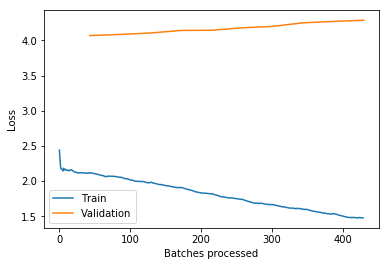

In [23]:
wd=1e-7
lr=1e-3
lrs = lr
epch = 10

learn.fit(epch, lrs, wd)
learn.recorder.plot_losses()

# Generate text

In [79]:
 idea = learn.predict("xxbos xxfld 1", n_words=30, temperature=0.8)
 idea = idea.replace("xxbos xxfld 1 ","").strip()
 idea

') xxbos the most serious problem of life is that one has to die twice . it is difficult to think of a man . xxbos ... that created all'

In [133]:
 idea = learn.predict("xxbos xxfld 1", n_words=35, temperature=0.8)
 idea = idea.replace("xxbos xxfld 1 ","").strip()
 idea

'by 4 x 10 x 2 x 1 x 2 x ... .. ? ... xxbos i am a forest , and a night of dark trees : but one day might last for long'

In [92]:
 idea = learn.predict("xxbos xxfld 1", n_words=35, temperature=0.8)
 idea = idea.replace("xxbos xxfld 1 ","").strip()
 idea

'- 2 x - su xxbos when you are deciding to commit suicide and of whether you want to be a philosopher or thinker , you must wish to be a philosopher . xxbos in'

In [103]:
 idea = learn.predict("xxbos xxfld 1", n_words=35, temperature=0.8)
 idea = idea.replace("xxbos xxfld 1 ","").strip()
 idea

'+ x + iii / 2 ! + + ... xxbos the things that happened to me had been eternal , eternal sun for god i was dead , and of a god that spoke'

In [104]:
 idea = learn.predict("xxbos xxfld 1", n_words=35, temperature=0.8)
 idea = idea.replace("xxbos xxfld 1 ","").strip()
 idea

'+ x 3 al 3 : + 3 xxbos another genius is more convenient than a good friend . xxbos a man growing tired of loneliness and of a youth appears to enjoy happiness .'

In [47]:
idea = learn.predict("xxbos xxfld 1", n_words=25, temperature=0.95)
idea = idea.replace("xxbos xxfld 1 ","").strip()
idea 

'or 2 x - figure 1 ( the hint of a single you can not see your soul burned in your hand ; after all'

In [30]:
number_of_ideas = 100
ideas_counter = 0
all_ideas = []

for i in range(1000):
    idea = learn.predict("xxbos xxfld 1", n_words=20, temperature=0.8)
    ideas = idea.split("xxbos xxfld 1")
    ideas = ideas[1:-1]
    
    for idea in ideas:

        idea = idea.replace("xxbos xxfld 1 ","").strip()
        if(idea):
            all_ideas.append(idea)
            ideas_counter = ideas_counter+1
            print(idea)
            
    if ideas_counter > number_of_ideas:
        break

all_ideas

[]

In [0]:
all_ideas